In [43]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

In [44]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train --> ", x_train.shape)
print("y_train --> ", y_train.shape)
print("x_test  --> ", x_test.shape)
print("y_test  --> ", y_test.shape)

x_train -->  (50000, 32, 32, 3)
y_train -->  (50000, 1)
x_test  -->  (10000, 32, 32, 3)
y_test  -->  (10000, 1)


Etiquetas en y_train: [0 1 2 3 4 5 6 7 8 9]


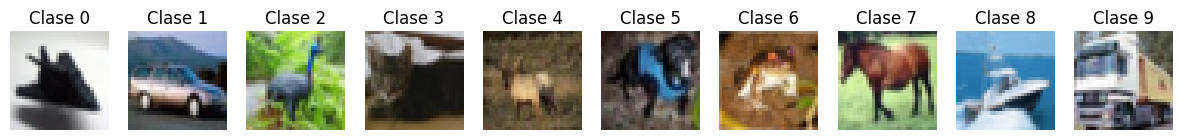

In [45]:
# Obtener una imagen representativa de cada clase
unique_classes = np.unique(y_train)
print("Etiquetas en y_train:", unique_classes)

sample_images = []

for class_label in unique_classes:
    # Encontrar el índice de la primera imagen de la clase actual
    index = np.where(y_train == class_label)[0][0]
    sample_images.append(x_train[index])

# Configurar la visualización de subtramas
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 3))

# Mostrar una imagen de cada clase
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Clase {unique_classes[i]}")
    ax.axis('off')

plt.show()


In [46]:
# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [47]:
# Convertir las etiquetas a one-hot encoding
y_trainB = to_categorical(y_train, 10)
y_testB = to_categorical(y_test, 10)

print("y_trainB --> ", y_trainB.shape)
print("y_testB  --> ", y_testB.shape)

y_trainB -->  (50000, 10)
y_testB  -->  (10000, 10)


### Definición del modelo

In [48]:
# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Flatten(input_shape=(32, 32, 3)))
#model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
#model.add(LeakyReLU(alpha=0.05))
model.add(Dense(128, activation = 'tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Configuración para entrenamiento
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
#es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=0.0001)

#H = model.fit(x = X_train, y = Y_train, epochs=50, batch_size = 20,
#              validation_data = (X_test, Y_test),  callbacks=[es])

H=model.fit(x_train, y_trainB, epochs=50, batch_size = 200,validation_data=(x_test, y_testB))


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2227 - loss: 2.4444 - val_accuracy: 0.3361 - val_loss: 2.0758
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3425 - loss: 2.0793 - val_accuracy: 0.3722 - val_loss: 2.0135
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3667 - loss: 2.0007 - val_accuracy: 0.3801 - val_loss: 1.9716
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3912 - loss: 1.9481 - val_accuracy: 0.3894 - val_loss: 1.9433
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4064 - loss: 1.8909 - val_accuracy: 0.3920 - val_loss: 1.8895
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4135 - loss: 1.8592 - val_accuracy: 0.4089 - val_loss: 1.8519
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4307 - loss: 1.8113 - val_accuracy: 0.4430 - val_loss: 1.7685
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4295 - loss: 1.7991 - val_accuracy: 0.

In [51]:
print("épocas = %d" % len(H.history["val_accuracy"]))
#print("Epocas = %d" % es.stopped_epoch)

épocas = 50


In [52]:
# predecir la salida del modelo
y_predB = model.predict(x_train)
y_pred = np.argmax(y_predB,axis=1)


print("%% aciertos x_train : %.3f" % metrics.accuracy_score(y_train, y_pred))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
% aciertos x_train : 0.531


In [53]:
report = metrics.classification_report(y_train, y_pred)
print("Confusion matrix Training:\n%s" % report)

MM = metrics.confusion_matrix(y_train, y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.65      0.53      0.58      5000
           1       0.46      0.88      0.60      5000
           2       0.53      0.30      0.38      5000
           3       0.44      0.34      0.38      5000
           4       0.65      0.25      0.36      5000
           5       0.41      0.56      0.48      5000
           6       0.44      0.75      0.56      5000
           7       0.76      0.52      0.62      5000
           8       0.68      0.63      0.65      5000
           9       0.62      0.54      0.58      5000

    accuracy                           0.53     50000
   macro avg       0.56      0.53      0.52     50000
weighted avg       0.56      0.53      0.52     50000

Confusion matrix:
[[2656  739  114  119   44  189  196   73  610  260]
 [  58 4406   15   36    9   39   95   34   86  222]
 [ 426  357 1507  353  212  689 1022  167  145  122]
 [  95  349  161 1691   53 1345  907 

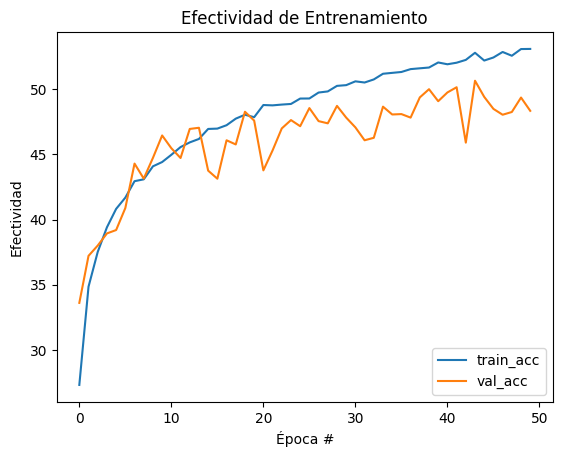

In [54]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

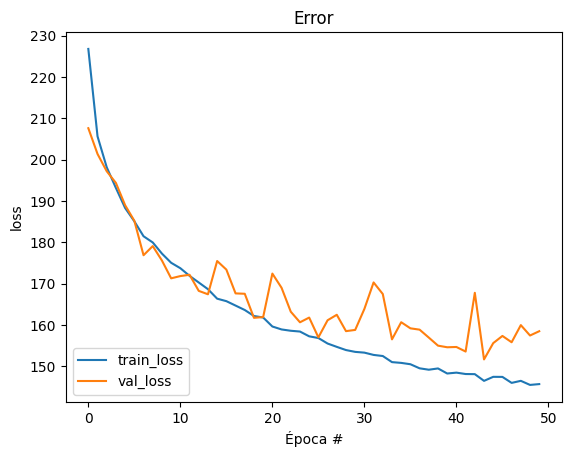

In [55]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Error")
plt.xlabel("Época #")
plt.ylabel("loss")
plt.legend(loc="lower left")